In [382]:
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import optimize
from scipy import sparse

In [383]:
from retrievals.utils import exp_space

In [384]:
from simulation import WiracSimulator

In [385]:
data_dir = '../data/'
sim = WiracSimulator(data_dir)

sim.set_wind_simple(u_wind=60, v_wind=-40)
sim.set_pos_los([22, 22], [90, -90], ['East', 'West'])

ARTS[202178976]: - verbosityInit

ARTS[202178976]: - verbositySet



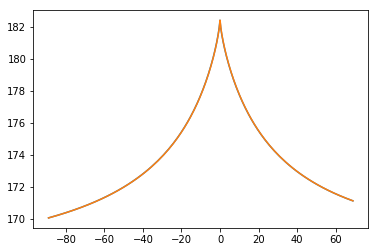

In [386]:
sim.sensor_off()
y_east_red, y_west_red = sim.measure()
freq_red = sim.frequency
freq_diff_red = (freq_red - sim.fc)/1e6

plt.plot(freq_diff_red, y_east_red)
plt.plot(freq_diff_red, y_west_red)
plt.show()

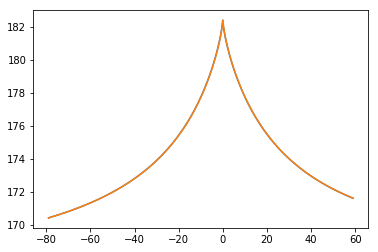

In [387]:
sim.sensor_on()
y_east, y_west = sim.measure()
freq = sim.frequency
freq_diff = (freq - sim.fc)/1e6

plt.plot(freq_diff, y_east)
plt.plot(freq_diff, y_west)
plt.show()

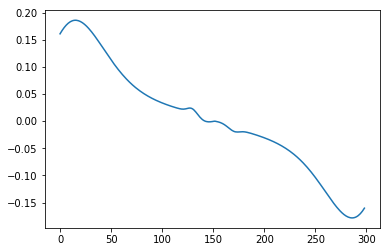

In [18]:
plt.plot(np.diff(y_east_red))

In [178]:
# Sensor
fc = 142.17504e9
num_channels = 2**14 * 120 / 200
f_min = 142.0950424414062e9 + 10e6
f_max = 142.2350253515625e9 - 10e6
resolution = (f_max - f_min) / num_channels

f_grid = exp_space(f_min - 10e6, f_max + 10e6, 300, fc, 2)
np.min(np.diff(f_grid))

166.3382568359375

In [153]:
freq = np.linspace(-10, 10, 10000)
freq_red = exp_space(-10, 10, 10, 0, 2)

/export/bulk2/miniconda3/envs/retrievals/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in long_scalars
/export/bulk2/miniconda3/envs/retrievals/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in long_scalars


array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

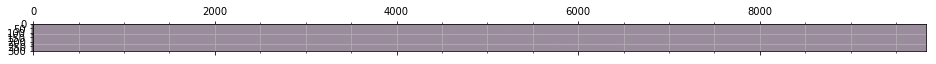

In [163]:
N = len(freq_red)-1
M = len(freq)
sr = np.zeros((N, M))

for i in range(N-1):
    lower = freq_red[i]
    upper = freq_red[i+1]
    start = np.searchsorted(freq, lower)
    stop = np.searchsorted(freq, upper)
    sr[i, start:stop] = 1 / (stop-start)
sr[i+1, stop:] = 1 / (M-stop)



plt.matshow(sr)
plt.minorticks_on()
plt.grid(True, which='both')
np.sum(sr, 0).min(), np.sum(sr, 0).max()
np.sum(sr, 1)

In [167]:
np.min(np.diff(freq_red))

238.86676025390625

In [120]:
(sr.dot(y)).shape

(4,)

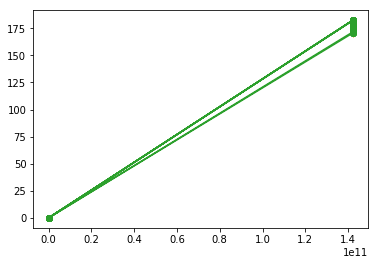

In [166]:
y = 1 / (1+freq**2)
y_red = 1 / (1+freq_red**2)
y = y_east
y_red = y_east_red
y_red2 = sr.dot(y)
freq_red2 = sr.dot(freq)
plt.plot(freq, y)
plt.plot(freq_red, y_red, marker='+')
plt.plot(freq_red2, y_red2, marker='o')

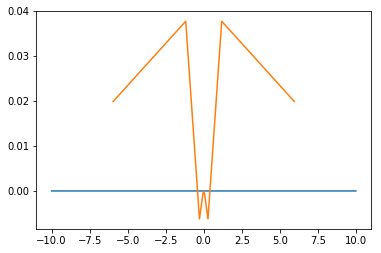

In [157]:
plt.plot(freq_red, y_red-np.interp(freq_red, freq, y))
plt.plot(freq_red2, y_red2-np.interp(freq_red2, freq, y))

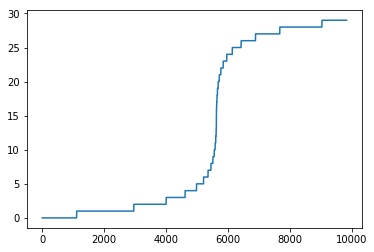

In [35]:
width = np.diff(f_grid)
width = np.append(width, 0)

bins = f_grid + width / 2

idx = np.digitize(freq, bins)
plt.plot(idx)

In [194]:
x = np.arange(0,100)
y = (np.exp(x/20))
y

array([  1.        ,   1.0512711 ,   1.10517092,   1.16183424,
         1.22140276,   1.28402542,   1.34985881,   1.41906755,
         1.4918247 ,   1.56831219,   1.64872127,   1.73325302,
         1.8221188 ,   1.91554083,   2.01375271,   2.11700002,
         2.22554093,   2.33964685,   2.45960311,   2.58570966,
         2.71828183,   2.85765112,   3.00416602,   3.15819291,
         3.32011692,   3.49034296,   3.66929667,   3.85742553,
         4.05519997,   4.26311452,   4.48168907,   4.71147018,
         4.95303242,   5.20697983,   5.47394739,   5.75460268,
         6.04964746,   6.35981952,   6.68589444,   7.02868758,
         7.3890561 ,   7.76790111,   8.16616991,   8.5848584 ,
         9.0250135 ,   9.48773584,   9.97418245,  10.48556972,
        11.02317638,  11.58834672,  12.18249396,  12.80710378,
        13.46373804,  14.15403865,  14.87973172,  15.64263188,
        16.44464677,  17.28778184,  18.17414537,  19.10595373,
        20.08553692,  21.11534442,  22.19795128,  23.33

In [197]:
np.sum(y), np.sum(np.round(y))

(2875.1707984054656, 2872.0)

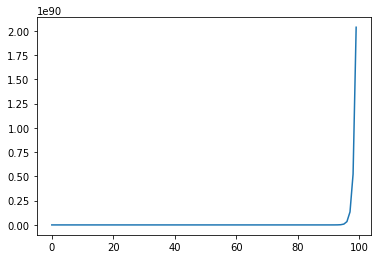

In [233]:
plt.plot(f(np.linspace(1.1, 2, 100)))

In [265]:
R**1, R**2

(1.0194027163735737, 1.0391818981498209)

In [443]:
left_width = np.sum(freq<fc)
right_width = np.sum(freq>=fc)
max_half_width = left_width if left_width > right_width else right_width
max_half_width

5628

In [514]:
N = 150
M = max_half_width #2**14
a = 1e-6

def ser(R, i):
    return np.ceil(a*R**i)

def seq(R, n):
    a = 0
    for i in range(n):
        a += ser(R, i)
    return a

R = optimize.brentq(lambda x: seq(x, N)-M, 1+1e-6, 10)

S = np.zeros((N, M))
for i in range(N-1):
    start = int(seq(R, i))
    stop = int(seq(R, i+1))
    S[i, start:stop] = 1
S[i+1, stop:] = 1
R

1.1465169275722606

Spaltensumme min, max:  1.0 1.0


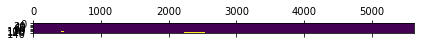

In [515]:
fig, ax = plt.subplots()
ax.matshow(S)
fig.tight_layout()
print('Spaltensumme min, max: ', np.min(np.sum(S, 0)), np.max(np.sum(S, 0)))
fig.savefig('../out/example_S.pdf')

In [484]:
nums = np.diff(np.concatenate([np.array([0]), np.nonzero(np.diff(np.sum(S, 1)))[0]]))
nums

array([65,  9,  6,  4,  3,  3,  2,  2,  2,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1])

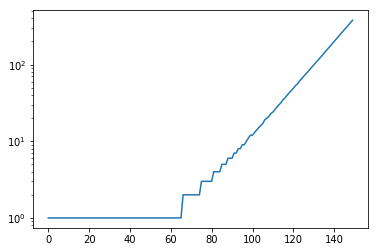

In [485]:
plt.semilogy(np.sum(S, 1))

In [516]:
St = np.flipud(np.fliplr(S))
z = np.zeros_like(S)
Sfull = np.block([[St, z], [z, S]])

In [517]:
Mreq = len(freq)
if left_width > right_width:
    # Crop right
    Sfull = Sfull[:, :Mreq]
else:
    # Crop left
    Sfull = Sfull[:, Mreq:]

Sfull = Sfull[Sfull.sum(axis=1)>0,:]

row_sums = Sfull.sum(axis=1)
#row_sums[row_sums==0] = np.nan
Snorm = Sfull / row_sums[:, np.newaxis]

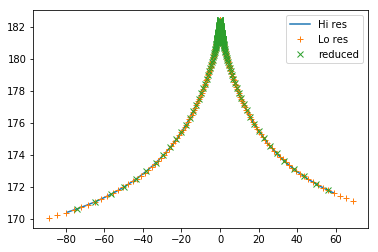

In [529]:
y = y_east
freq_red2 = Snorm.dot(freq)
y_red2 = Snorm.dot(y)

def fdiff(f):
    return (f-fc)/1e6

fig, ax = plt.subplots()
ax.plot(fdiff(freq), y, label='Hi res')
ax.plot(fdiff(freq_red), y_red, marker='+', lw=0, label='Lo res')
ax.plot(fdiff(freq_red2), y_red2, marker='x', lw=0, label='reduced')
ax.legend()
len(y_red2)
fig.savefig('/iap/MW/users/hagen/projects/daily_cycle/report/images/spectra.pdf')

0.004215217875440658

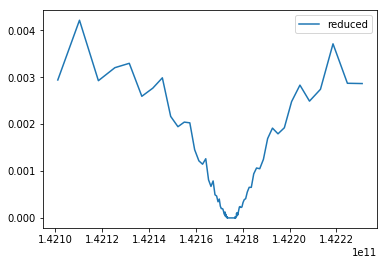

In [522]:
#plt.plot(freq_red, y_red-np.interp(freq_red, freq, y), label='Lo res')
diff_red2 = y_red2-np.interp(freq_red2, freq, y)
plt.plot(freq_red2, diff_red2, label='reduced')
plt.legend()
np.max(abs(diff_red2))

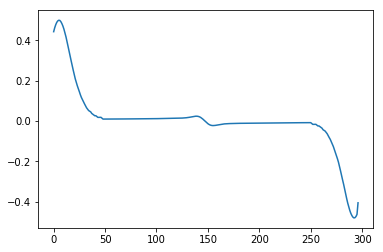

In [521]:
plt.plot(np.diff(y_red2))